# Data Cleaning: iFood data from Web Scraping

iFood is a Brazilian company founded in 2011, active in the field of food delivery over the internet, being a leader in the sector in Latin America, with a presence in Argentina, Mexico and Colombia.   
This notebook is about *cleaning some data* from a web scraping proccess. There are 4 data sets collected from [iFood website](https://www.ifood.com.br/) by 4 people from IME Jr. There are, also, [my code from another web scraping proccess](https://github.com/KenzoBH/Web-Scraping-and-EDA/blob/main/web-scraping-ifood.py), that collects a clean data already.   

> [Bruno Kenzo](https://kenzobh.github.io/).

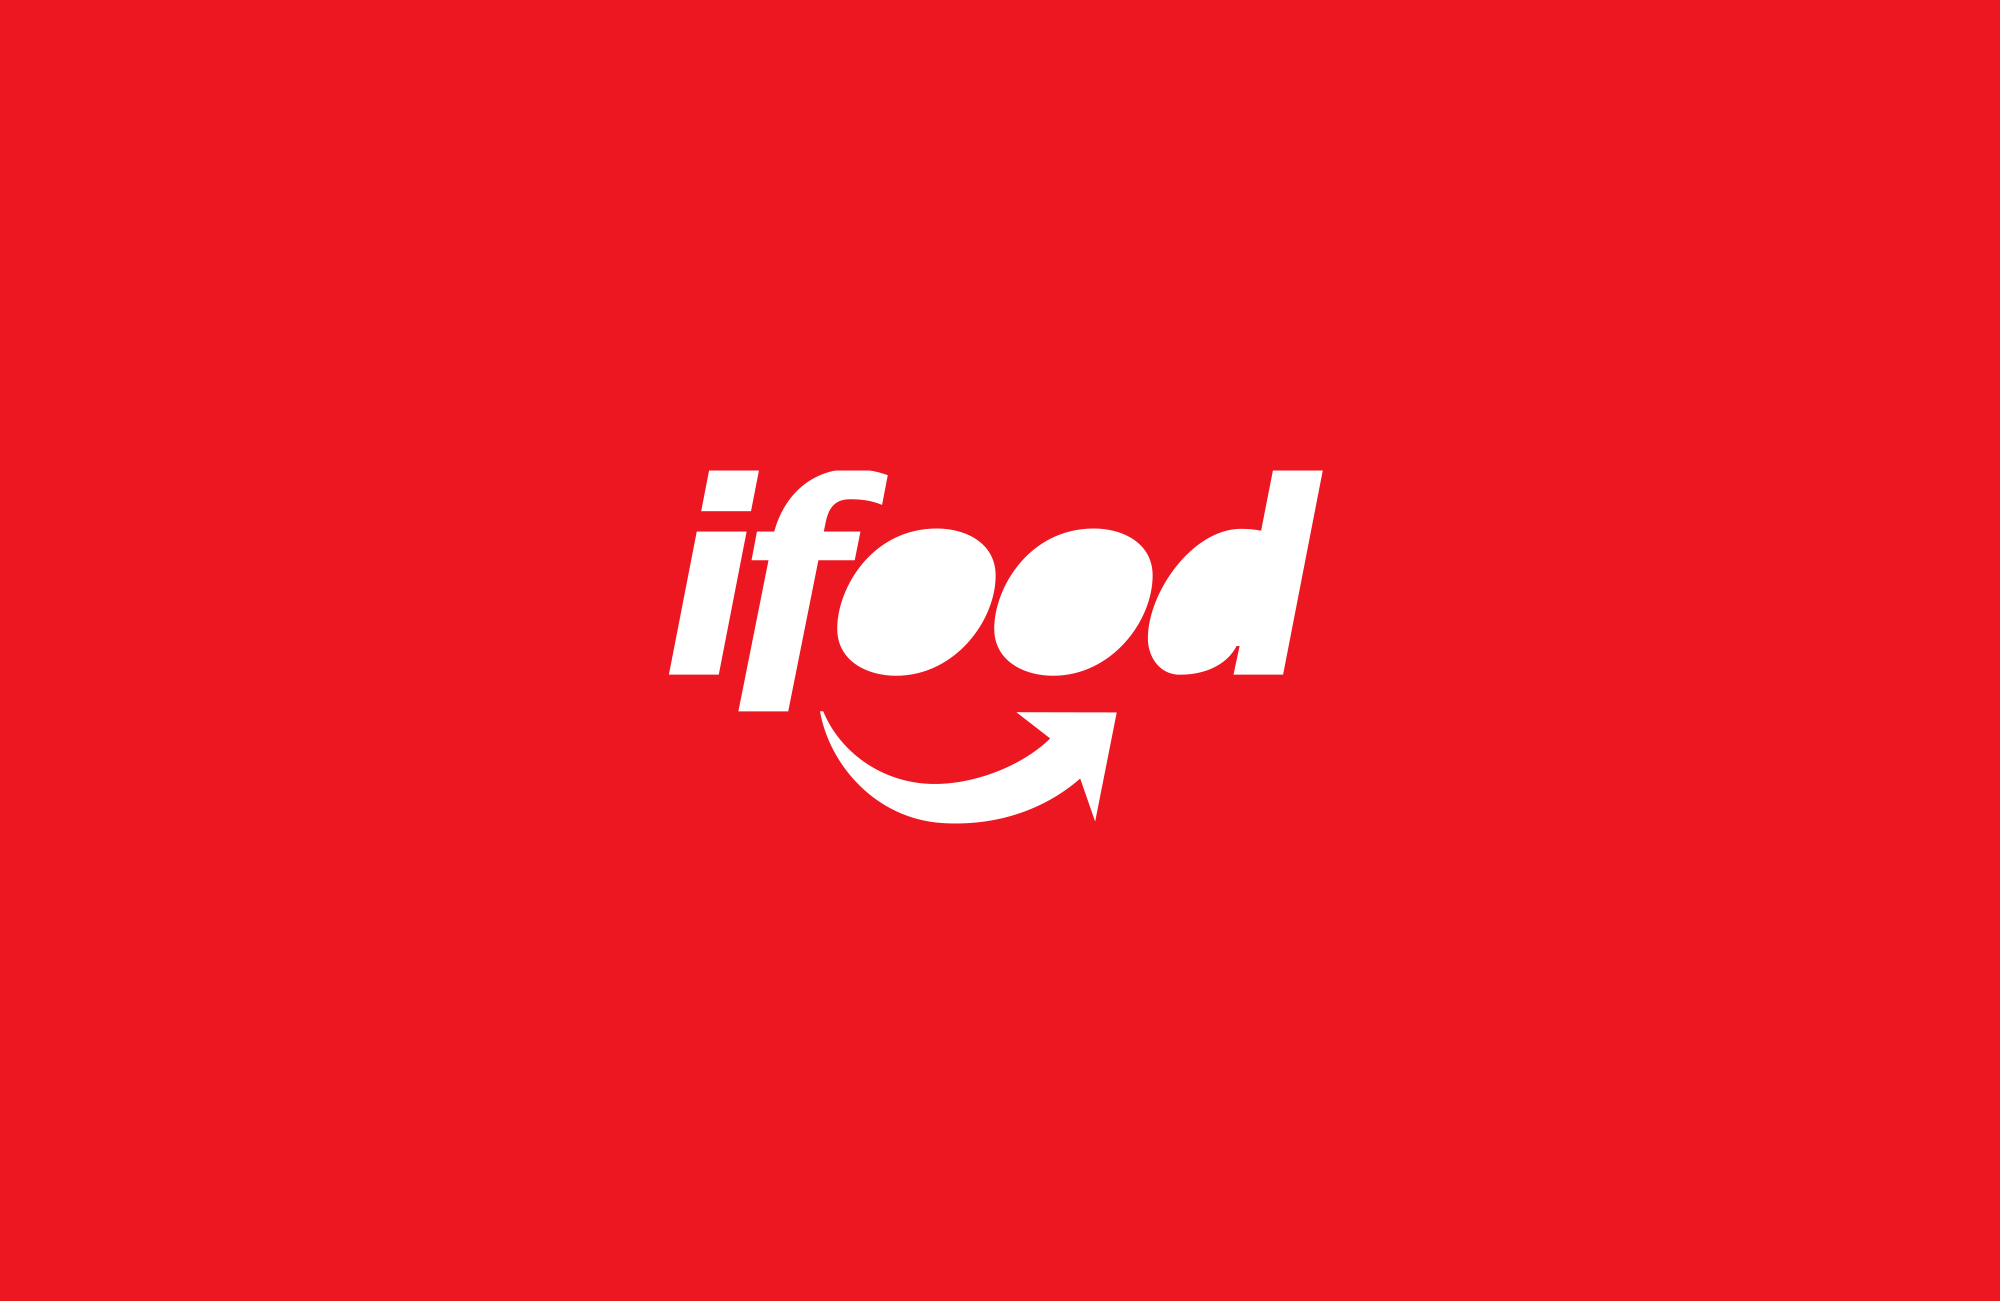

In [1]:
import pandas as pd
import numpy as np

Reading the 4 DataFrames, from Alexandre, Emanuel, Emerson and Marco.

In [2]:
df1 = pd.read_csv('alexandre_felix.csv')
df2 = pd.read_csv('emanuel_hark.csv')
df3 = pd.read_csv('emerson_aragao.csv')
df4 = pd.read_csv('marco_rodrigues.csv')

dfs = [df1, df2, df3, df4]

In [3]:
for df in dfs:
    print(df.columns, df.shape) # Verify the variables and the shape of each DataFrame
    print()

Index(['web-scraper-order', 'web-scraper-start-url', 'Título', 'Nota', 'Tipo',
       'Tempo', 'preco_entrega'],
      dtype='object') (30, 7)

Index(['web-scraper-order', 'web-scraper-start-url', 'Titulo', 'Notas', 'Tipo',
       'Tempo', 'Preco'],
      dtype='object') (30, 7)

Index(['web-scraper-order', 'web-scraper-start-url', 'Titulo', 'Nota', 'Tipo',
       'Tempo', 'preço_entrega'],
      dtype='object') (30, 7)

Index(['web-scraper-order', 'web-scraper-start-url', 'título', 'nota', 'tipo',
       'tempo', 'preço_entrega'],
      dtype='object') (30, 7)



Maybe, it's possible to make just one pipeline to clean the data, and repeat to the others df's, once that the data came from the same method from collection, and the columns are in the same order, but with different names. Let's see if that's possible.

In [4]:
df1.head() # See the first 5 rows of the dataset

,web-scraper-order,web-scraper-start-url,Título,Nota,Tipo,Tempo,preco_entrega
0,1615840324-14,https://www.ifood.com.br/lista-restaurantes?f_...,"FILHO DA FRUTA ""RESTAURANTE""",4.7,"4.7 • Brasileira • 2,8 km",40-50 min,40-50 min • Grátis
1,1615840324-12,https://www.ifood.com.br/lista-restaurantes?f_...,Ponto da Esfiha Itapevi,4.1,"4.1 • Pizza • 1,5 km",45-55 min,45-55 min • R$ 5.00
2,1615840324-2,https://www.ifood.com.br/lista-restaurantes?f_...,Sodiê Doces - Itapevi Jardim da Rainha,4.6,"4.6 • Doces & Bolos • 2,3 km",80-90 min,80-90 min • R$ 7.00
3,1615840324-19,https://www.ifood.com.br/lista-restaurantes?f_...,🍔lanches Bem Bolado🍔,4.9,"4.9 • Lanches • 3,0 km",60-70 min,60-70 min • R$ 7.99
4,1615840324-9,https://www.ifood.com.br/lista-restaurantes?f_...,Japa House,4.5,"4.5 • Japonesa • 3,2 km",60-70 min,60-70 min • R$ 5.00


In [5]:
df2.head()

,web-scraper-order,web-scraper-start-url,Titulo,Notas,Tipo,Tempo,Preco
0,1615674534-4,https://www.ifood.com.br/lista-restaurantes?f_...,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49
1,1615674534-23,https://www.ifood.com.br/lista-restaurantes?f_...,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99
2,1615674534-20,https://www.ifood.com.br/lista-restaurantes?f_...,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99
3,1615674534-6,https://www.ifood.com.br/lista-restaurantes?f_...,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99
4,1615674534-12,https://www.ifood.com.br/lista-restaurantes?f_...,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99


In [6]:
df3.head()

,web-scraper-order,web-scraper-start-url,Titulo,Nota,Tipo,Tempo,preço_entrega
0,1615673252-4,https://www.ifood.com.br/lista-restaurantes?f_...,Boutique Burger,4.6,"4.6 • Lanches • 3,9 km",46-56 min,R$ 11.99
1,1615673252-16,https://www.ifood.com.br/lista-restaurantes?f_...,China in Box - Itaquera,4.7,"4.7 • Chinesa • 4,6 km",40-50 min,R$ 8.50
2,1615673252-30,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria Kailane,4.6,"4.6 • Pizza • 3,6 km",55-65 min,R$ 5.00
3,1615673252-22,https://www.ifood.com.br/lista-restaurantes?f_...,Padaria Carisma,4.5,"4.5 • Padaria • 2,3 km",39-49 min,R$ 5.99
4,1615673252-9,https://www.ifood.com.br/lista-restaurantes?f_...,Divino Fogão - Metrô Itaquera,4.6,"4.6 • Brasileira • 6,0 km",51-61 min,R$ 13.49


In [7]:
df4.head()

,web-scraper-order,web-scraper-start-url,título,nota,tipo,tempo,preço_entrega
0,1616135872-16,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria e Refeiçoes Levi,4.5,"4.5 • Pizza • 0,8 km",25-35 min,NaN
1,1616135872-23,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria e Esfiharia Massa Mania,Novo!,"Novo! • Brasileira • 4,2 km",50-60 min,R$ 15.00
2,1616135872-27,https://www.ifood.com.br/lista-restaurantes?f_...,Riviera Delivery,Novo!,"Novo! • Brasileira • 3,0 km",30-40 min,R$ 4.00
3,1616135872-12,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria da Madrugada,4.7,"4.7 • Pizza • 0,8 km",25-35 min,NaN
4,1616135872-8,https://www.ifood.com.br/lista-restaurantes?f_...,Formiguento's Burguer,4.2,"4.2 • Variada • 2,8 km",40-50 min,R$ 3.50


As above, the df's look similar. Then, I opted for using 5 steps to clean the data:
- **Step 01:** drop the first 2 columns from all 4 df's;
- **Step 02:** get the ratings and the food types from the restaurants from the column that contains both informations;
- **Step 03:** get the times, from the column that contains a range of times - I caught the mean value from the range;
- **Step 04:** finally, the price, from the last columns from all df's, that contains the time too;
- **Step 05:** then, I analysed the NaN's, and saved the final dataframe - the concatenation of the 4 df's - in a csv file.

## Step 01
*Drop columns from all 4 df's*

In [8]:
# Step function definition
def step01_drop_columns(df):
    df = df.drop(['web-scraper-order', 'web-scraper-start-url'], axis = 1)
    return df

In [9]:
# Updates each dataframe
for i in range(len(dfs)):
    dfs[i] = step01_drop_columns(dfs[i])
dfs[0].head()

,Título,Nota,Tipo,Tempo,preco_entrega
0,"FILHO DA FRUTA ""RESTAURANTE""",4.7,"4.7 • Brasileira • 2,8 km",40-50 min,40-50 min • Grátis
1,Ponto da Esfiha Itapevi,4.1,"4.1 • Pizza • 1,5 km",45-55 min,45-55 min • R$ 5.00
2,Sodiê Doces - Itapevi Jardim da Rainha,4.6,"4.6 • Doces & Bolos • 2,3 km",80-90 min,80-90 min • R$ 7.00
3,🍔lanches Bem Bolado🍔,4.9,"4.9 • Lanches • 3,0 km",60-70 min,60-70 min • R$ 7.99
4,Japa House,4.5,"4.5 • Japonesa • 3,2 km",60-70 min,60-70 min • R$ 5.00


Cool! The first 2 columns from all 4 dataframes are gone.

## Step 02
*Get the ratings and the food types from the restaurants from the column that contains both informations*

In [10]:
dfs[0].dtypes # See the variable types of the first dataframe

Título           object
Nota             object
Tipo             object
Tempo            object
preco_entrega    object
dtype: object

In [11]:
# About "Nota" column
print(df1['Nota'].isna().sum())   # There are 2 NaN's
df1['Nota'].value_counts()        # There's a data named "Novo!": it has to be NaN or 0, I opted for 0

2


4.9      6
4.5      5
4.6      3
4.8      3
4.1      3
4.3      2
4.7      2
Novo!    1
4.0      1
3.8      1
4.2      1
Name: Nota, dtype: int64

In [12]:
# About "Tipo" column
df1['Tipo'].sample(5) # The data contains 3 informations: the rate, the >food type< and 
                      # the distance from the data colector

1        4.1 • Pizza • 1,5 km
19     4.2 • Lanches • 2,4 km
21     4.3 • Lanches • 1,2 km
24     4.8 • Lanches • 2,5 km
28    4.5 • Japonesa • 2,0 km
Name: Tipo, dtype: object

In [13]:
# Step function definition
# First, from the column that contain both informations, we'll split the data into
# a list like ['4.3', 'Lanches', '1,2 km']. Then, I'll get the first data to be the rate,
# and the second one to be the food type
def step02_get_ratings_and_food_types(df):
    ratings = []
    food_types = []
    for data in df.iloc[:, 2]: # A loop for each data in the 3rd column 
        data_list = data.split(' • ') # Splits the data into a list
        if len(data_list) == 3:
            food_type = data_list[1]
            if data_list[0] == 'Novo!':
                rate = 0
            else:
                rate = float(data_list[0])
        else:
            rate = 0
            food_type = data_list[0]
        ratings.append(rate)
        food_types.append(food_type)
    df.iloc[:, 1] = ratings
    df.iloc[:, 2] = food_types
    return df

In [14]:
# Updates each dataframe
for df in dfs:
    df = step02_get_ratings_and_food_types(df)
dfs[1].sample(5)

,Titulo,Notas,Tipo,Tempo,Preco
8,Brasileirinho Delivery - Centro - Sp,4.4,Brasileira,50-60 min,NaN
22,Bob's - Bráulio Gomes,4.7,Lanches,33-43 min,R$ 4.99
16,Sushi Barra Funda,4.4,Japonesa,45-55 min,NaN
5,Al Capizza Pacaembu - Entrega própia,4.2,Pizza,35-45 min,NaN
20,Açaí Concept - Augusta,4.3,Açaí,22-32 min,R$ 5.99


## Step 03
*Get the times, from the column that contains a range of times - I caught the mean value from the range*

In [15]:
# Step function definition
# For each time range in the "Tempo" column, we'll split the data into a list
# like ['19', '29 min'], get the two numbers, and return the mean of them both
def step03_get_times(df):
    time_ranges = []
    for time in df.iloc[:, 3]:
        if pd.isna(time): # Looks if that's NaN
            time_ranges.append(np.nan)
        else:
            times = time.split('-')
            for x in times:
                times[1] = times[1][:-2]
            time_ranges.append([int(times[0]), int(times[1])])
    mean_times = []
    for time_range in time_ranges:
        if type(time_range) == float: # Looks if that's NaN
            mean_times.append(np.nan)
        else:
            mean_time = (time_range[0] + time_range[1])/2
            mean_times.append(mean_time)
    df.iloc[:, 3] = mean_times
    return df

In [16]:
# Updates each dataframe
for df in dfs:
    df = step03_get_times(df)
dfs[3].sample(5)

,título,nota,tipo,tempo,preço_entrega
19,Rei do Medalhão,3.7,Brasileira,35.0,R$ 5.00
23,Adega Parceria drinks,4.7,Bebidas,25.0,R$ 9.00
17,"Yamamoto Sushi R$ 1,00",4.8,Japonesa,35.0,R$ 6.00
21,Pizzaria Delícia das Massas,4.6,Pizza,35.0,NaN
3,Pizzaria da Madrugada,4.7,Pizza,30.0,NaN


## Step 04
*Finally, the price, from the last columns from all df's, that contains the time too*

There's a subtlety here. The first dataframe has the time and the price in the same column, while the others have the price in a isolated column. Then, I made a function to clean the first df and another one to clean the remaining ones.

In [17]:
dfs[0].sample(2) # See the last column

,Título,Nota,Tipo,Tempo,preco_entrega
18,Bistrô Lázara Beer,4.5,Brasileira,65.0,60-70 min • R$ 4.00
25,Fogas Búrguer,0.0,Lanches,55.0,50-60 min • R$ 4.00


In [18]:
dfs[1].sample(2) # See the last column

,Titulo,Notas,Tipo,Tempo,Preco
28,Joy Korean Food,4.8,Coreana,34.0,R$ 7.99
20,Açaí Concept - Augusta,4.3,Açaí,27.0,R$ 5.99


In [19]:
# Step function definition
# We'll split by ' • ' string on the first dataframe, and get the price
# from a list like ['60-70 min', 'R$ 7.00']
def step04_get_prices_df1(df):
    prices = []
    for x in df.iloc[:, 4]:
        x_list = x.split(' • ')
        if x_list[1] == 'Grátis':
            price = 0
        else:
            price = float(x_list[1][3:])
        prices.append(price)
    df.iloc[:, 4] = prices
    return df

In [20]:
# Updates the first dataframe
dfs[0] = step04_get_prices_df1(dfs[0])

In [21]:
dfs[0].sample(5)

,Título,Nota,Tipo,Tempo,preco_entrega
22,Trilha em Sabor,4.9,Lanches,50.0,7.0
17,Restaurante Recanto São Judas,4.6,Brasileira,55.0,6.0
24,Tapiocaria Vovo Lili,4.8,Lanches,65.0,7.0
9,Canto da Esfiha,4.7,Lanches,65.0,5.0
14,Mc Pizzaria e Burgueria,4.0,Pizza,55.0,0.0


Looks clean!

In [22]:
# Step function definition
# Just cuts the 'R$ ' from the last column
def step04_get_prices(df):
    prices = []
    for price in df.iloc[:, 4]:
        if pd.isna(price): # Looks if that's NaN
            prices.append(np.nan)
        else:
            prices.append(float(price[3:]))
    df.iloc[:, 4] = prices
    return df

In [23]:
# Updates the remaining dataframes
dfs[1] = step04_get_prices(dfs[1])
dfs[2] = step04_get_prices(dfs[2])
dfs[3] = step04_get_prices(dfs[3])
dfs[1].sample(5)

,Titulo,Notas,Tipo,Tempo,Preco
3,Casa Europa,4.8,Italiana,40.0,12.99
23,Poke Haus,4.8,Japonesa,41.0,16.99
28,Joy Korean Food,4.8,Coreana,34.0,7.99
11,Mocotó Café - Shopping D,4.9,Brasileira,45.0,7.99
2,Amor Aos Pedaços - West Plaza,4.3,Doces & Bolos,39.0,7.99


## Step 05
*Then, I analysed the NaN's, and saved the final dataframe - the concatenation of the 4 df's - in a csv file*

In [24]:
# Added the data collectior from each dataframe and renamed all collumns from each dataframe

dfs[0]['Dono'] = 'Alexandre Felix'
dfs[1]['Dono'] = 'Emanuel Hark'
dfs[2]['Dono'] = 'Emerson Aragão'
dfs[3]['Dono'] = 'Marco Rodrigues'

names = ['Título', 'Nota', 'Tipo', 'Tempo', 'Preço', 'Dono']
for df in dfs:
    df.columns = names

In [25]:
# Verify the data types
for df in dfs:
    print(df.dtypes)

Título     object
Nota      float64
Tipo       object
Tempo     float64
Preço     float64
Dono       object
dtype: object
Título     object
Nota      float64
Tipo       object
Tempo     float64
Preço     float64
Dono       object
dtype: object
Título     object
Nota      float64
Tipo       object
Tempo     float64
Preço     float64
Dono       object
dtype: object
Título     object
Nota      float64
Tipo       object
Tempo     float64
Preço     float64
Dono       object
dtype: object


Looks good! Now, let's compare them - the first dataframes to the clean ones:

In [26]:
df1.head()

,web-scraper-order,web-scraper-start-url,Título,Nota,Tipo,Tempo,preco_entrega
0,1615840324-14,https://www.ifood.com.br/lista-restaurantes?f_...,"FILHO DA FRUTA ""RESTAURANTE""",4.7,"4.7 • Brasileira • 2,8 km",40-50 min,40-50 min • Grátis
1,1615840324-12,https://www.ifood.com.br/lista-restaurantes?f_...,Ponto da Esfiha Itapevi,4.1,"4.1 • Pizza • 1,5 km",45-55 min,45-55 min • R$ 5.00
2,1615840324-2,https://www.ifood.com.br/lista-restaurantes?f_...,Sodiê Doces - Itapevi Jardim da Rainha,4.6,"4.6 • Doces & Bolos • 2,3 km",80-90 min,80-90 min • R$ 7.00
3,1615840324-19,https://www.ifood.com.br/lista-restaurantes?f_...,🍔lanches Bem Bolado🍔,4.9,"4.9 • Lanches • 3,0 km",60-70 min,60-70 min • R$ 7.99
4,1615840324-9,https://www.ifood.com.br/lista-restaurantes?f_...,Japa House,4.5,"4.5 • Japonesa • 3,2 km",60-70 min,60-70 min • R$ 5.00


In [27]:
dfs[0].head()

,Título,Nota,Tipo,Tempo,Preço,Dono
0,"FILHO DA FRUTA ""RESTAURANTE""",4.7,Brasileira,45.0,0.00,Alexandre Felix
1,Ponto da Esfiha Itapevi,4.1,Pizza,50.0,5.00,Alexandre Felix
2,Sodiê Doces - Itapevi Jardim da Rainha,4.6,Doces & Bolos,85.0,7.00,Alexandre Felix
3,🍔lanches Bem Bolado🍔,4.9,Lanches,65.0,7.99,Alexandre Felix
4,Japa House,4.5,Japonesa,65.0,5.00,Alexandre Felix


In [28]:
df2.head()

,web-scraper-order,web-scraper-start-url,Titulo,Notas,Tipo,Tempo,Preco
0,1615674534-4,https://www.ifood.com.br/lista-restaurantes?f_...,Z Deli Dogs,4.6,"4.6 • Lanches • 3,8 km",30-40 min,R$ 10.49
1,1615674534-23,https://www.ifood.com.br/lista-restaurantes?f_...,Andiamo Ristorante - Cidade São Paulo,4.7,"4.7 • Italiana • 3,3 km",34-44 min,R$ 9.99
2,1615674534-20,https://www.ifood.com.br/lista-restaurantes?f_...,Amor Aos Pedaços - West Plaza,4.3,"4.3 • Doces & Bolos • 3,0 km",34-44 min,R$ 7.99
3,1615674534-6,https://www.ifood.com.br/lista-restaurantes?f_...,Casa Europa,4.8,"4.8 • Italiana • 4,8 km",35-45 min,R$ 12.99
4,1615674534-12,https://www.ifood.com.br/lista-restaurantes?f_...,Lancheria Original Brasil Santana,Novo!,"Novo! • Açaí • 4,0 km",22-32 min,R$ 6.99


In [29]:
dfs[1].head()

,Título,Nota,Tipo,Tempo,Preço,Dono
0,Z Deli Dogs,4.6,Lanches,35.0,10.49,Emanuel Hark
1,Andiamo Ristorante - Cidade São Paulo,4.7,Italiana,39.0,9.99,Emanuel Hark
2,Amor Aos Pedaços - West Plaza,4.3,Doces & Bolos,39.0,7.99,Emanuel Hark
3,Casa Europa,4.8,Italiana,40.0,12.99,Emanuel Hark
4,Lancheria Original Brasil Santana,0.0,Açaí,27.0,6.99,Emanuel Hark


In [30]:
df3.head()

,web-scraper-order,web-scraper-start-url,Titulo,Nota,Tipo,Tempo,preço_entrega
0,1615673252-4,https://www.ifood.com.br/lista-restaurantes?f_...,Boutique Burger,4.6,"4.6 • Lanches • 3,9 km",46-56 min,R$ 11.99
1,1615673252-16,https://www.ifood.com.br/lista-restaurantes?f_...,China in Box - Itaquera,4.7,"4.7 • Chinesa • 4,6 km",40-50 min,R$ 8.50
2,1615673252-30,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria Kailane,4.6,"4.6 • Pizza • 3,6 km",55-65 min,R$ 5.00
3,1615673252-22,https://www.ifood.com.br/lista-restaurantes?f_...,Padaria Carisma,4.5,"4.5 • Padaria • 2,3 km",39-49 min,R$ 5.99
4,1615673252-9,https://www.ifood.com.br/lista-restaurantes?f_...,Divino Fogão - Metrô Itaquera,4.6,"4.6 • Brasileira • 6,0 km",51-61 min,R$ 13.49


In [31]:
dfs[2].head()

,Título,Nota,Tipo,Tempo,Preço,Dono
0,Boutique Burger,4.6,Lanches,51.0,11.99,Emerson Aragão
1,China in Box - Itaquera,4.7,Chinesa,45.0,8.50,Emerson Aragão
2,Pizzaria Kailane,4.6,Pizza,60.0,5.00,Emerson Aragão
3,Padaria Carisma,4.5,Padaria,44.0,5.99,Emerson Aragão
4,Divino Fogão - Metrô Itaquera,4.6,Brasileira,56.0,13.49,Emerson Aragão


In [32]:
df4.head()

,web-scraper-order,web-scraper-start-url,título,nota,tipo,tempo,preço_entrega
0,1616135872-16,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria e Refeiçoes Levi,4.5,"4.5 • Pizza • 0,8 km",25-35 min,NaN
1,1616135872-23,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria e Esfiharia Massa Mania,Novo!,"Novo! • Brasileira • 4,2 km",50-60 min,R$ 15.00
2,1616135872-27,https://www.ifood.com.br/lista-restaurantes?f_...,Riviera Delivery,Novo!,"Novo! • Brasileira • 3,0 km",30-40 min,R$ 4.00
3,1616135872-12,https://www.ifood.com.br/lista-restaurantes?f_...,Pizzaria da Madrugada,4.7,"4.7 • Pizza • 0,8 km",25-35 min,NaN
4,1616135872-8,https://www.ifood.com.br/lista-restaurantes?f_...,Formiguento's Burguer,4.2,"4.2 • Variada • 2,8 km",40-50 min,R$ 3.50


In [33]:
dfs[3].head()

,Título,Nota,Tipo,Tempo,Preço,Dono
0,Pizzaria e Refeiçoes Levi,4.5,Pizza,30.0,NaN,Marco Rodrigues
1,Pizzaria e Esfiharia Massa Mania,0.0,Brasileira,55.0,15.0,Marco Rodrigues
2,Riviera Delivery,0.0,Brasileira,35.0,4.0,Marco Rodrigues
3,Pizzaria da Madrugada,4.7,Pizza,30.0,NaN,Marco Rodrigues
4,Formiguento's Burguer,4.2,Variada,45.0,3.5,Marco Rodrigues


Looks pretty good. Now, I'll concatenate them into one dataframe `df`, and look for NaN's, to save into a `.csv` file.

In [34]:
df = pd.concat(dfs, ignore_index = True)

In [35]:
df

,Título,Nota,Tipo,Tempo,Preço,Dono
0,"FILHO DA FRUTA ""RESTAURANTE""",4.7,Brasileira,45.0,0.00,Alexandre Felix
1,Ponto da Esfiha Itapevi,4.1,Pizza,50.0,5.00,Alexandre Felix
2,Sodiê Doces - Itapevi Jardim da Rainha,4.6,Doces & Bolos,85.0,7.00,Alexandre Felix
3,🍔lanches Bem Bolado🍔,4.9,Lanches,65.0,7.99,Alexandre Felix
4,Japa House,4.5,Japonesa,65.0,5.00,Alexandre Felix
...,...,...,...,...,...,...
115,Ebenézer,5.0,Marmita,NaN,6.90,Marco Rodrigues
116,Johnny Rockets - Dk Campo Limpo,4.3,Hambúrguer,65.0,7.99,Marco Rodrigues
117,Lima´s Lanches,4.7,Lanches,95.0,22.00,Marco Rodrigues
118,Jakes Food,5.0,Lanches,45.0,NaN,Marco Rodrigues


Looking for missing values:

In [36]:
df.isna().sum()

Título     0
Nota       0
Tipo       0
Tempo      2
Preço     20
Dono       0
dtype: int64

Most of them comes from "Preço" column: that's why they're 0, in fact. Maybe, in the web scraping proccess, when the price was `R$ 0,00`, the website showed in a different way - in a different object on HTML.

In [37]:
df[df.isna().any(axis = 1)]

,Título,Nota,Tipo,Tempo,Preço,Dono
35,Al Capizza Pacaembu - Entrega própia,4.2,Pizza,40.0,NaN,Emanuel Hark
38,Brasileirinho Delivery - Centro - Sp,4.4,Brasileira,55.0,NaN,Emanuel Hark
43,Eskina Pacaembu,4.1,Pizza,25.0,NaN,Emanuel Hark
46,Sushi Barra Funda,4.4,Japonesa,50.0,NaN,Emanuel Hark
54,Pizzaria São Paulo City,4.4,Pizza,25.0,NaN,Emanuel Hark
69,Don Corleone,4.8,Pizza,55.0,NaN,Emerson Aragão
70,Rita Refeicoes,4.6,Brasileira,50.0,NaN,Emerson Aragão
76,Pizzaria D'villa,4.2,Pizza,40.0,NaN,Emerson Aragão
79,Hamburgueria Texas,4.8,Lanches,50.0,NaN,Emerson Aragão
83,A Preferida,4.5,Pizza,40.0,NaN,Emerson Aragão


In [38]:
df['Preço'] = df['Preço'].fillna(0.0)

In [39]:
df[df.isna().any(axis = 1)]

,Título,Nota,Tipo,Tempo,Preço,Dono
115,Ebenézer,5.0,Marmita,NaN,6.90,Marco Rodrigues
119,Divino Fogão - Shopping Campo Limpo,4.7,Brasileira,NaN,14.49,Marco Rodrigues


The other ones I'll drop from the dataframe - I could fill them with the mean or the median value from the data collector dataframe, but it's only two values, then I opted to drop them.

In [40]:
df = df.dropna()

Now, the data is **clean** - not at all, because some restaurant names are capitalizes, other ones are all in uppercase, there are some emojis too, and so on; but, that's good for me.    
Yay!
Now, let's save it in a csv file.

In [41]:
df.to_csv('final-ifood-data.csv', index = False) # I saved without index

In [42]:
df

,Título,Nota,Tipo,Tempo,Preço,Dono
0,"FILHO DA FRUTA ""RESTAURANTE""",4.7,Brasileira,45.0,0.00,Alexandre Felix
1,Ponto da Esfiha Itapevi,4.1,Pizza,50.0,5.00,Alexandre Felix
2,Sodiê Doces - Itapevi Jardim da Rainha,4.6,Doces & Bolos,85.0,7.00,Alexandre Felix
3,🍔lanches Bem Bolado🍔,4.9,Lanches,65.0,7.99,Alexandre Felix
4,Japa House,4.5,Japonesa,65.0,5.00,Alexandre Felix
...,...,...,...,...,...,...
113,Adega Parceria drinks,4.7,Bebidas,25.0,9.00,Marco Rodrigues
114,Burguer Store,0.0,Lanches,125.0,13.00,Marco Rodrigues
116,Johnny Rockets - Dk Campo Limpo,4.3,Hambúrguer,65.0,7.99,Marco Rodrigues
117,Lima´s Lanches,4.7,Lanches,95.0,22.00,Marco Rodrigues


You can see the final file [here](https://github.com/KenzoBH/Web-Scraping-and-EDA/blob/main/final-ifood-data.csv).   
The next step is a EDA with this data. You can see this project repository [here](https://github.com/KenzoBH/Web-Scraping-and-EDA).

Thanks for your reading!

> ## **Bruno Kenzo.**   
> Follow me on my [LinkedIn](https://www.linkedin.com/in/bruno-kenzo/) :D    
> or on my [Github](https://github.com/KenzoBH) XD    
> and take a look at [my website](https://kenzobh.github.io/) :p